# Topic 39: Natural Language Processing

Agenda today:
- Text analytics and NLP
- Pre-Processing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
- Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)
- Text Classification
    - Use features from text to detect satire
- Next Steps/Project Ideas :)
    - Document clustering: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis(LSA) 
    - Word Embeddings

## Part I. Overview of Text Analytics and NLP
NLP allows computers to interact with text data in a structured and sensible way. In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Classifying documents 
- Speech recognition and audio processing 

In this section, we will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

**Vocab Word:** 

*Corpus* = Total collection of documents used for training

*Document* = One sample, or observation.  This may be a sentence, an article, a message, or some other collection of text.  

#### Overview of NLP process 
1. **Tokenize Data**: Usually means splitting a document into a list of words.  SOMETIMES means splitting a document into a list of sentences.
2. **Remove Special Characters**: Usually means punctuation, accents, etc.  Keep A-Z, a-z, and sometimes 0-9.
3. **Lower Case all Words**: This is done so that 'Horse' is treated the same as 'horse' by the model.
4. **Remove Stop Words**: These are words with no semantic meaning such as 'the', 'a', 'again', 'i', and many others.  Could also include words particular to a corpus (complete collection of training documents) that are syntactic and not semantic in function.
5. **Semantic Normalization**: We stem or lemmatize words so that 'try', 'trying', and 'tried', for instance, are all treated the same by the model. 
6. **Vectorize Data**: This is the process of turning words and documents into numbers.  There are many strategies for this, and it is a key feature engineering step in NLP.  

Word vectors can get very long as a function of the total vocabulary of the training corpus, therefor memory and computationally expensive.  For many vectoriziaiton strategies, the final form of the data has a feature for every word in the entire vocabulary of the training set.  This is another reason we remove as many redundencies in the documents as possible with the above techniques.  It is a feature reduction technique!

7. **Model Data and Make Prediction**: 

## Part II. Pre-Processing for NLP

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import numpy as np

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

#The below is not used, but is often a great model for text classification.  You can try it on your own!
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/josh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/josh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/josh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Tokenization 
Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

### N-Grams:
**1-grams**
"David", "works", "here"

**2-grams**
"David works", "works here"

## The Data

The dataset we will be working with is taken from a Kaggle competition run 4 years ago.  it is a collection of almost 20k snippets of text from horror authers, HP Lovecraft, Edgar Allen Poe, and Mary Wollstonecraft Shelley.  The goal of the competition is to successfully predict which author wrote the text.  We shall see how well we can do!

The raw data can be found at: https://www.kaggle.com/c/spooky-author-identification/data

In [2]:
df = pd.read_csv('horror_writers.csv')
df

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [3]:
# We don't need the 'id' column, so let's drop it now.

df = df.drop('id', axis=1)

In [4]:
df['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [5]:
df.isna().sum()

text      0
author    0
dtype: int64

Our class imbalance is slight and we have no missing data.  Let's continue to explore the data and process it for prediction.

# Tokenizing with String Methods

We can use the str.split() method to transform a string into a list.  str.split() splits on spaces by default, but can split on any symbol

In [6]:
first_text = df.loc[0, 'text']
first_text

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [7]:
#split on white space (default for str.split() method)
first_text.split()

['This',
 'process,',
 'however,',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 'dimensions',
 'of',
 'my',
 'dungeon;',
 'as',
 'I',
 'might',
 'make',
 'its',
 'circuit,',
 'and',
 'return',
 'to',
 'the',
 'point',
 'whence',
 'I',
 'set',
 'out,',
 'without',
 'being',
 'aware',
 'of',
 'the',
 'fact;',
 'so',
 'perfectly',
 'uniform',
 'seemed',
 'the',
 'wall.']

In [8]:
#split on semi-colons
first_text.split('; ')

['This process, however, afforded me no means of ascertaining the dimensions of my dungeon',
 'as I might make its circuit, and return to the point whence I set out, without being aware of the fact',
 'so perfectly uniform seemed the wall.']

# nltk or Natural Language Tool Kit

nltk is a powerful package of natural language processing tools.  It has functions and transformers that make many of the tasks of natural language easier while taking advantage of powerful tools and libraris

# Tokenizing With nltk.tokenize.RegexpTokenizer

The RegexpTokenizer is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
tokenizer.tokenize(df['text'][0])

['This',
 'process',
 'however',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 'dimensions',
 'of',
 'my',
 'dungeon',
 'as',
 'I',
 'might',
 'make',
 'its',
 'circuit',
 'and',
 'return',
 'to',
 'the',
 'point',
 'whence',
 'I',
 'set',
 'out',
 'without',
 'being',
 'aware',
 'of',
 'the',
 'fact',
 'so',
 'perfectly',
 'uniform',
 'seemed',
 'the',
 'wall']

**Question**

What is the difference between the output of the nltk RegexpTokenizer and the output of review.split()?  The difference is very subtle, but important for our modeling.

# Tokenize all of the text.

We can use list comprehension to tokenize all of the documents in our corpus.  

Note, this step does not cause data leakage and can be done before a split.

*YOUR ANSWER HERE*

In [10]:
df['tokens'] = [tokenizer.tokenize(text) for text in df['text']]
print(df['tokens'].head())

0    [This, process, however, afforded, me, no, mea...
1    [It, never, once, occurred, to, me, that, the,...
2    [In, his, left, hand, was, a, gold, snuff, box...
3    [How, lovely, is, spring, As, we, looked, from...
4    [Finding, nothing, else, not, even, gold, the,...
Name: tokens, dtype: object


# Exploratory Data Analysis

Text data is fundamentally different than the tabular data we've been using in so many of our previous models.  It does not have explicit numeric values, nor are the features naturally one-hot-encodable.

However, there several methods of data exploration we can use that are specific to text data.

1. Document length (sentences, articles, snippets, or however each document
2. Average word length
3. Frequency distributions

## Word and Document lengths

Sometimes the lengths of words, sentences and documents can give clues to how to classify documents.  Our text is divided by sentences, so we will explore the average length of words and the average lengths of documents.  

{'EAP': 4.448521400491681, 'HPL': 4.478856114298154, 'MWS': 4.431556462069602}


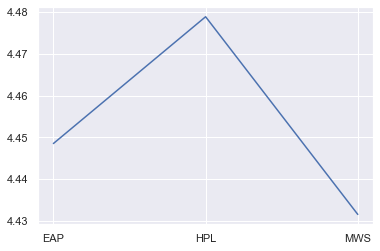

In [11]:
#Mean word length
df['mean_word_len'] = df['tokens'].apply(lambda x: np.mean([len(w) for w in x]))

author_word_len = {}
for auth in df['author'].unique():
    mean_len = df.loc[df['author'] == auth, 'mean_word_len'].mean()
    author_word_len[auth] = mean_len
    
print(author_word_len)
to_plot = author_word_len.items()
plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot])

{'EAP': 25.520506329113925, 'HPL': 27.93558118899734, 'MWS': 27.47683653209795}


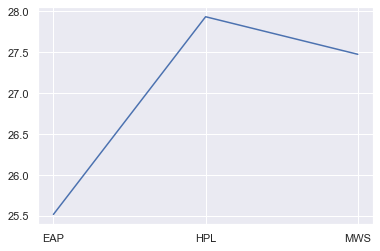

In [12]:
#mean document length
df['doc_len'] = df['tokens'].str.len()

author_doc_len = {}
for auth in df['author'].unique():
    mean_len = df.loc[df['author'] == auth, 'doc_len'].mean()
    author_doc_len[auth] = mean_len
print(author_doc_len)
to_plot = author_doc_len.items()
plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot])

## Frequency distributions

Another clue to how documents differ is how often they use different words.  Let's explore our texts by frequency distribution.

In [13]:
all_text = ''.join(df['text'])
all_text = all_text.split(' ')

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(all_text)
print(fdist)

<FreqDist with 56129 samples and 503778 outcomes>


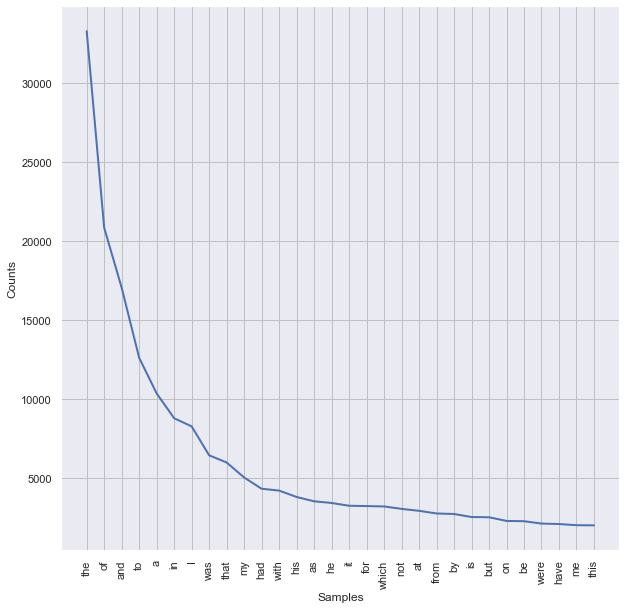

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
plt.figure(figsize=(10,10))
fdist.plot(30)

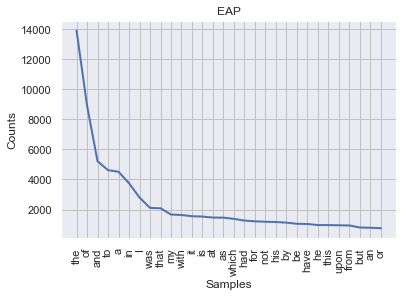

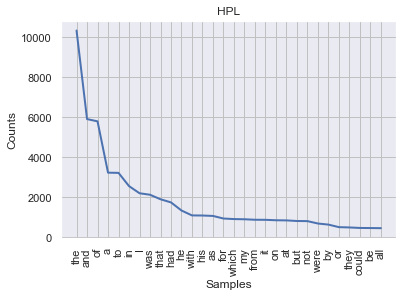

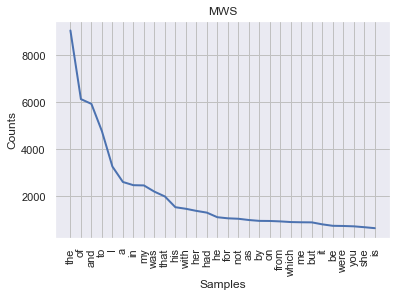

In [16]:
for author in df['author'].unique():
    text = df.loc[df['author'] == author, 'text']
    text = ''.join(text)
    text = text.split(' ')
    fdist = FreqDist(text)
    fdist.plot(30, title=author)

Are the words very informative? Can we extract useful information based on this frequency distribution of the most common words? 

# Back to Preprocessing

We tokenized our data, which is the first step in NLP preprocessing.  Then we took a slight detour to explore the data from there.

Now we are heading back to preprocessing.  The next step is:

### Stopwords Removal

Stopwords are words that are so common that they do not carry much semantic meaning.  They can be distractions for our models, much like features with low correlations to a target can be distractions and cause overfitting.  

nltk offers a great list of stopwords in several languages.  Remember, English is not the only language we may want to process!

In [17]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'all', 'an', 'hadn', 'against', 'did', 'why', 'before', 'mustn', 'of', 'themselves', 'their', "hasn't", 'where', 'being', 'very', 'its', 'no', 'shan', 'at', 'should', 'my', 'how', 'on', 'she', 'that', 'yourself', 'hers', 'him', 'herself', 'are', 'if', 'nor', 'not', 'll', "won't", 'under', 'been', 'wouldn', 'does', 'ain', "you'll", 'but', 'isn', 'then', "weren't", 'over', "aren't", 'and', "isn't", 'your', "haven't", 'in', 'few', "shan't", 'd', 'doing', 'has', "shouldn't", "couldn't", 'what', 'from', "you'd", 'ourselves', 'doesn', "she's", 'won', 'same', "wouldn't", 'each', 'his', 'as', 'off', 'ma', "didn't", 'other', 'himself', 'so', 'he', "wasn't", 'with', 'out', 'there', "mightn't", 'into', 'or', "you've", 'only', 'will', 'who', 'it', 'about', 'aren', 'the', 'up', "mustn't", 'our', 'ours', 've', 'don', 'am', 'is', 'i', 'were', 'hasn', "it's", 'you', "you're", 'for', 'now', 'because', 'didn', 'until', 'can', 'her', 're', 'theirs', 'them', 'during', 'itself', 'once', 'while', 'having',

In [18]:
#first we lower the case of all of our words.  
#'The' and 'the' (for example) should be treated the same by our model.

df['lower_tokens'] = df['tokens'].apply(lambda x: [w.lower() for w in x])
df.head()

,text,author,tokens,mean_word_len,doc_len,lower_tokens
0,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, me, no, mea...",4.487805,41,"[this, process, however, afforded, me, no, mea..."
1,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...",4.071429,14,"[it, never, once, occurred, to, me, that, the,..."
2,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...",4.444444,36,"[in, his, left, hand, was, a, gold, snuff, box..."
3,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...",4.970588,34,"[how, lovely, is, spring, as, we, looked, from..."
4,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, not, even, gold, the,...",5.333333,27,"[finding, nothing, else, not, even, gold, the,..."


In [19]:
df['lower_tokens'] = df['tokens'].apply(lambda x: [w.lower() for w in x])
df.head()

,text,author,tokens,mean_word_len,doc_len,lower_tokens
0,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, me, no, mea...",4.487805,41,"[this, process, however, afforded, me, no, mea..."
1,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...",4.071429,14,"[it, never, once, occurred, to, me, that, the,..."
2,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...",4.444444,36,"[in, his, left, hand, was, a, gold, snuff, box..."
3,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...",4.970588,34,"[how, lovely, is, spring, as, we, looked, from..."
4,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, not, even, gold, the,...",5.333333,27,"[finding, nothing, else, not, even, gold, the,..."


Then we will remove any stopwords that appear in our list: `stop_words`

In [20]:
df['no_stops'] = df['lower_tokens'].apply(lambda x: [w for w in x if w not in stop_words])
df['no_stops']

0        [process, however, afforded, means, ascertaini...
1        [never, occurred, fumbling, might, mere, mistake]
2        [left, hand, gold, snuff, box, capered, hill, ...
3        [lovely, spring, looked, windsor, terrace, six...
4        [finding, nothing, else, even, gold, superinte...
                               ...                        
19574    [could, fancied, looked, eminent, landscape, p...
19575                    [lids, clenched, together, spasm]
19576    [mais, il, faut, agir, say, frenchman, never, ...
19577    [item, news, like, strikes, us, coolly, received]
19578    [laid, gnarled, claw, shoulder, seemed, shakin...
Name: no_stops, Length: 19579, dtype: object

Now we have removed **semantically meaningless** words.

In [21]:
print(len(df['tokens'][0]))
print(len(df['no_stops'][0]))

41
21


By removing stop words we have reduced the size of our document by half.  Remember, fewer and more important features is usually better!

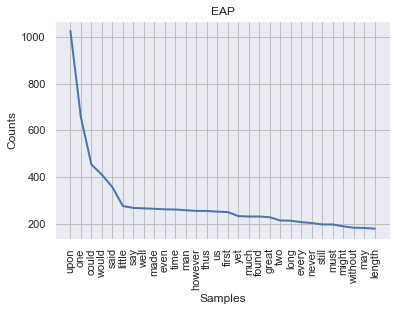

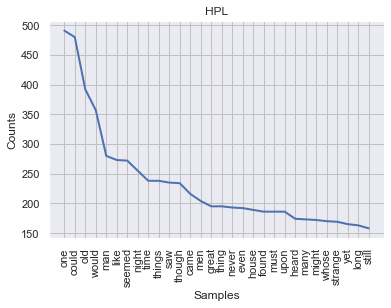

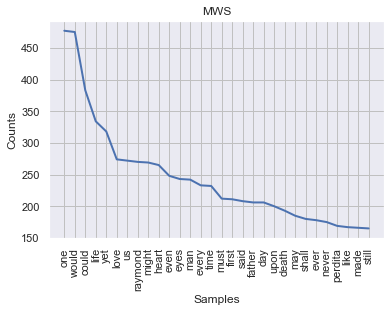

In [22]:
#create a frequency graph for each author after removing stop words
for author in df['author'].unique():
    text = df.loc[df['author'] == author, 'no_stops']
    #join all the tokens in 'no_stops' into one string for each document
    text = text.str.join(' ')
    #join all the documents into one long string
    text = ' '.join(text)
    #split the long list of words into tokens again
    text = text.split()
    fdist = FreqDist(text)
    fdist.plot(30, title=author)

# Word Clouds

These are fun ways of viewing frequency distributions.  While they aren't as easy to analyze as graphs, they make great visualizations for presentations.  We will use the `wordcloud` package.

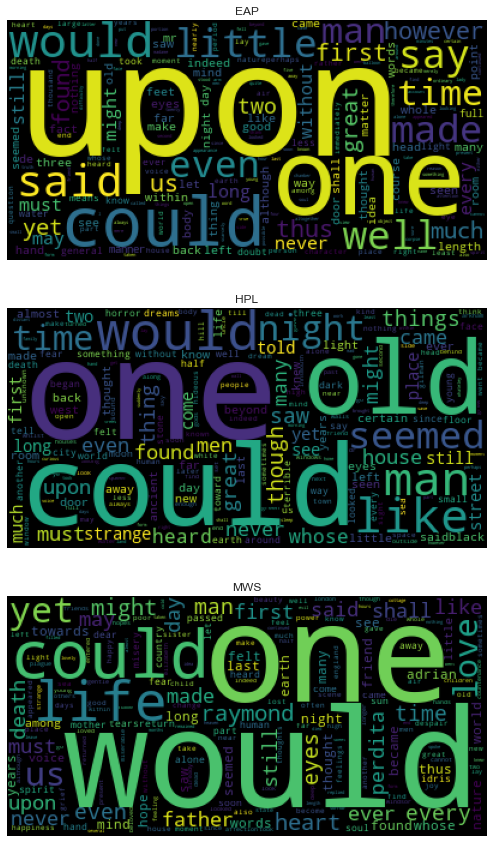

In [23]:
from wordcloud import WordCloud

fig, axes = plt.subplots(3,1, figsize=(10,15))
#Create a word cloud for each author's documents
for ax, author in zip(axes, df['author'].unique()):
    text = df.loc[df['author'] == author, 'no_stops']
    #the documents are tokenized, so we will join them back to strings
    text = text.str.join(' ')
    #then we will join all of the documents into one large string
    text = ' '.join(text)
    #finall, we split the complete string back into tokens.
    text = text.split(' ')
    fdist = FreqDist(text)    
    wcloud = WordCloud().generate_from_frequencies(fdist)

    ax.imshow(wcloud)
    ax.set_title(author)
    ax.axis('off')
plt.show()

#### Lexicon Normalization 
Aside from stopwords, a different type of noise can arise in NLP. For example, collect, collection, collected, and collecting are all similar words. This is a problem because our models will treat every unique token as a different feature, when often we want them to be treated the same.

Using stemming and lemmatization would reduce all variations of the same word to the root version of all its derivations. 

###### Stemming 
Stemming allows us to remove different variations of the same word. For example, collect, collection and collecting will all be reduced to the same single word collect.
- Stemming is the process of reducing inflection in words to their root forms, such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
 
- Stems are created by removing the suffixes or prefixes used with a word.
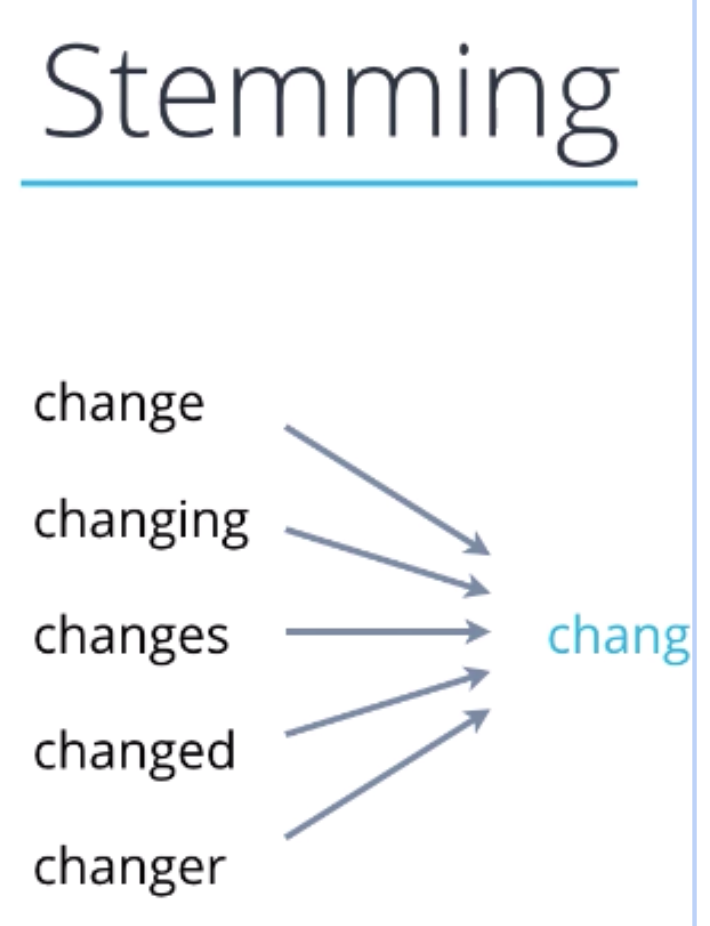

In [24]:
# Stemming
from nltk.stem import PorterStemmer

In [25]:
ps = PorterStemmer()
df['stems'] = df['no_stops'].apply(lambda x: [ps.stem(w) for w in x])
df['stems']

0        [process, howev, afford, mean, ascertain, dime...
1               [never, occur, fumbl, might, mere, mistak]
2        [left, hand, gold, snuff, box, caper, hill, cu...
3        [love, spring, look, windsor, terrac, sixteen,...
4        [find, noth, els, even, gold, superintend, aba...
                               ...                        
19574    [could, fanci, look, emin, landscap, painter, ...
19575                         [lid, clench, togeth, spasm]
19576    [mai, il, faut, agir, say, frenchman, never, f...
19577       [item, news, like, strike, us, coolli, receiv]
19578    [laid, gnarl, claw, shoulder, seem, shake, alt...
Name: stems, Length: 19579, dtype: object

#### Lemmatization
The only difference between lemmatization and stemming is that lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

<img src="../resources/stemmin_lemm_ex-1.png" width=400;>

In [26]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [27]:
print("movies:", lemmatizer.lemmatize("movies")) 
print("collecting:", lemmatizer.lemmatize("collecting")) 
print("collection:", lemmatizer.lemmatize("collection")) 
print("collections:", lemmatizer.lemmatize("collections")) 

movies: movie
collecting: collecting
collection: collection
collections: collection


In [28]:
# comparing it with stemming 
print("movies:", ps.stem("movies")) 
print("collecting:", ps.stem("collecting")) 
print("collection:", ps.stem("collection")) 
print("collections:", ps.stem("collections")) 

movies: movi
collecting: collect
collection: collect
collections: collect


In [29]:
# we can also lemmatize our original reviews
df['lemmas'] = df['no_stops'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df

,text,author,tokens,mean_word_len,doc_len,lower_tokens,no_stops,stems,lemmas
0,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, me, no, mea...",4.487805,41,"[this, process, however, afforded, me, no, mea...","[process, however, afforded, means, ascertaini...","[process, howev, afford, mean, ascertain, dime...","[process, however, afforded, mean, ascertainin..."
1,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...",4.071429,14,"[it, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumbl, might, mere, mistak]","[never, occurred, fumbling, might, mere, mistake]"
2,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...",4.444444,36,"[in, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, caper, hill, cu...","[left, hand, gold, snuff, box, capered, hill, ..."
3,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...",4.970588,34,"[how, lovely, is, spring, as, we, looked, from...","[lovely, spring, looked, windsor, terrace, six...","[love, spring, look, windsor, terrac, sixteen,...","[lovely, spring, looked, windsor, terrace, six..."
4,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, not, even, gold, the,...",5.333333,27,"[finding, nothing, else, not, even, gold, the,...","[finding, nothing, else, even, gold, superinte...","[find, noth, els, even, gold, superintend, aba...","[finding, nothing, else, even, gold, superinte..."
...,...,...,...,...,...,...,...,...,...
19574,"I could have fancied, while I looked at it, th...",EAP,"[I, could, have, fancied, while, I, looked, at...",4.300000,20,"[i, could, have, fancied, while, i, looked, at...","[could, fancied, looked, eminent, landscape, p...","[could, fanci, look, emin, landscap, painter, ...","[could, fancied, looked, eminent, landscape, p..."
19575,The lids clenched themselves together as if in...,EAP,"[The, lids, clenched, themselves, together, as...",4.500000,10,"[the, lids, clenched, themselves, together, as...","[lids, clenched, together, spasm]","[lid, clench, togeth, spasm]","[lid, clenched, together, spasm]"
19576,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, il, faut, agir, that, is, to, say, a, F...",4.153846,13,"[mais, il, faut, agir, that, is, to, say, a, f...","[mais, il, faut, agir, say, frenchman, never, ...","[mai, il, faut, agir, say, frenchman, never, f...","[mais, il, faut, agir, say, frenchman, never, ..."
19577,"For an item of news like this, it strikes us i...",EAP,"[For, an, item, of, news, like, this, it, stri...",3.800000,15,"[for, an, item, of, news, like, this, it, stri...","[item, news, like, strikes, us, coolly, received]","[item, news, like, strike, us, coolli, receiv]","[item, news, like, strike, u, coolly, received]"


## Part III. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as variables that take on different values for each observation. For example, we represent individuals with distinct education levels, income, and such. 

This is done differently in NLP. In order to pass text data to machine learning algorithms, we need to represent each text observation numerically. One such method is called **Bag-of-words (BoW)**. 

# Warning!!

**Vectorizing texts WILL create data leakage.  This step should be done after your train-test split.**

**Your vectorizer should be fitted on your train set before transforming your train and test sets.**

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. 

The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words data can be represented as a **Document Term Matrix**, or a Term Document Matrix, in which each column is an unique word and each row is a document. For example:

# Sample Documents

We are going to use some example documents, not our horror writer dataset.  This is because visualizing vectorized versions of very large corpi is difficult because of memory constraints.  These small examples will be easier to visualize what the vectorizer is doing.

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"

Can be represented as:
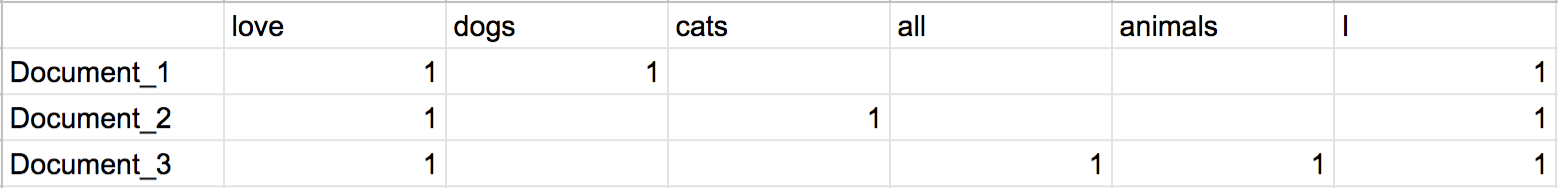

In [30]:
# implementing it in python
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

docs = ['I love dogs','I love cats','I love all animals']
#notice that CountVectorizer can help you remove stop words!
vec = CountVectorizer(stop_words=None)
X = vec.fit_transform(docs)

count_animals = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
count_animals

,all,animals,cats,dogs,love
0,0,0,0,1,1
1,0,0,1,0,1
2,1,1,0,0,1


### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

- TF (Term Frequency)
term frequency is simply the frequency of words in a document, and it can be represented as the number of times a term shows up in a document. 

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number  of  documents}{number  of  documents  containing  W})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [31]:
# let's implement it 
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
reviews = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
reviews

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [32]:
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# Notice that CountVectorizer can also tokenize your data!
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(reviews['review'])
text_counts

<4x275 sparse matrix of type '<class 'numpy.int64'>'
	with 308 stored elements in Compressed Sparse Row format>

## Sparse Matrices

In NLP you will often see datasets compressed into sparse matrices.  This is a compression technique that removes a common value to compress a dataframe.  Vectorized documents are somewhat like a one hot encoding of ALL tokens in your corpus, or the entire collection documents in your dataset.  Each document will therefor be mostly 0s.  

A sparse matrix removes all the zeros and only keep information about the non-zero elements.  This means you can't as easily inspect it, but most modeling packages can still use them the same as dense matrices.  This is a great way to transform a 70GB+ matrix of vectorized tokens into something that will actually fit in your working memory.  Fortunately the vectorizers we introduce here output sparse vectors by default.  Be very careful about using the .todense() method on vectorized datasets, they can grow to be too large for your computer to handle.

In [33]:
type(text_counts)

scipy.sparse.csr.csr_matrix

Behold, the sparse representation of our vectorized corpus as a pandas dataframe

In [34]:
pd.DataFrame(text_counts)

,0
0,"(0, 5)\t1\n (0, 0)\t4\n (0, 9)\t2\n (0, 1..."
1,"(0, 100)\t1\n (0, 84)\t3\n (0, 233)\t4\n ..."
2,"(0, 100)\t3\n (0, 25)\t4\n (0, 84)\t3\n (..."
3,"(0, 25)\t6\n (0, 226)\t1\n (0, 233)\t2\n ..."


# NOTE!!

Text vectors can be very long with a large vocabulary. If you have many samples then the non-sparse representation of them will be VERY large and may crash your memory.  I show them below because this dataset is small and I want you to see.

## Think about the size of your data before you try this at home.

In [35]:
cv_reviews = pd.DataFrame(text_counts.todense(), columns = cv.get_feature_names())
cv_reviews

,10,2,30,4,50,6,able,abusive,acquainted,acting,...,woman,won,worker,working,worth,write,writer,young,yuppie,z
0,4,1,1,3,2,1,0,0,0,2,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1,0,0,0,1,1,0


In [36]:
reviews['review']

0    6/10 Acting, not great but some good acting.<b...
1    Devil Hunter gained notoriety for the fact tha...
2    `Stanley and Iris' is a heart warming film abo...
3    This may not be a memorable classic, but it is...
Name: review, dtype: object

In [37]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(reviews['review'])
type(text_tf)

scipy.sparse.csr.csr_matrix

In [38]:
pd.DataFrame(text_tf.todense(), columns=tf.get_feature_names())

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,0.27707,0.069267,0.138535,0.000000,0.000000,0.000000,0.000000,0.138535,0.000000,0.000000,...,0.000000,0.000000,0.069267,0.000000,0.000000,0.069267,0.044212,0.000000,0.054611,0.000000
1,0.00000,0.000000,0.000000,0.042847,0.000000,0.000000,0.000000,0.000000,0.042847,0.042847,...,0.000000,0.000000,0.000000,0.042847,0.000000,0.000000,0.027349,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067858,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.059012,0.059012,0.000000,0.000000,0.000000,...,0.059012,0.046525,0.000000,0.000000,0.000000,0.000000,0.037666,0.059012,0.046525,0.059012


## Vectorize our Horror Writers

Let's use `TfidfVectorizer` to vectorize our tokenized and lemmatized horror writer sentences with stop words removed, and get ready to model them.

# Note:

`CountVectorizer` and `TfidfVectorizer` expect strings, not lists of strings.  We will need to join our tokens back together in order to use these vectorizers.

In [39]:
X = df['lemmas'].str.join(' ')
y = df['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [40]:
X_train

14164    perceived looked enquiringly half glance hope ...
8976     ah ah first contribution first say never magaz...
17850    spirit vow made scruple setting naught letter ...
107      said happened medical school west already made...
12790    must shut communion tell grieve say word unhap...
                               ...                        
13435    horror evil moon hung low puffy worm sea need ...
7763     form near seemed feel change also gradually br...
15377    wish bear especially mind spoken unusual degre...
17730    year nearer unto death fail see came shade sha...
15725    wilbur priceless imperfect copy dr dee english...
Name: lemmas, Length: 15663, dtype: object

In [41]:
tf_vectorizer = TfidfVectorizer()
#fit on X_train
tf_vectorizer.fit(X_train)
#transform both X_train and X_test
tf_train = tf_vectorizer.transform(X_train)
tf_test = tf_vectorizer.transform(X_test)
type(tf_train)

scipy.sparse.csr.csr_matrix

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(max_iter=1000)
tfidf_vectorizer = TfidfVectorizer()
lr_pipe = make_pipeline(tfidf_vectorizer, lr_model)

print('Scores for each cross validation fold:')
cross_val_score(lr_pipe, X_train, y_train)

Scores for each cross validation fold:


array([0.80242579, 0.81678902, 0.80338334, 0.7899106 , 0.80108557])

In [43]:
mnb_model = MultinomialNB()
mnb_pipe = make_pipeline(tfidf_vectorizer, mnb_model)
cross_val_score(mnb_pipe, X_train, y_train)

array([0.81200128, 0.82572614, 0.80370252, 0.79980843, 0.80619413])

The multinomial naive bayes seems to perform slightly better during cross validation.  Let's fit and evaluate on the test set.

In [44]:
mnb_pipe.fit(X_train, y_train)
print('Final score on holdout set')
mnb_pipe.score(X_test, y_test)

Final score on holdout set


0.8189479060265578

In [45]:
labels = mnb_pipe['multinomialnb'].classes_

<AxesSubplot:>

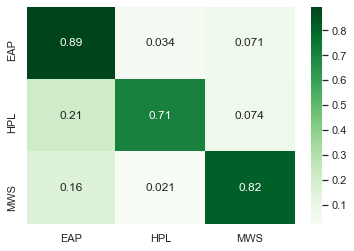

In [46]:
y_pred = mnb_pipe.predict(X_test)
labels = mnb_pipe['multinomialnb'].classes_
conf_mat = confusion_matrix(y_test, y_pred, normalize='true', labels=labels)
sns.heatmap(conf_mat, cmap='Greens', annot=True, xticklabels=labels,
           yticklabels=labels)

# Evaluation:

Using a standard, out of the box logistic regression model on our processed documents, our model was able to determine which 

## Another example, the easier way!
Now that you have a great basic understanding of feature engineering and preprocessing in NLP, we can move on to text classification using Naive Bayes and other classification algorithms. We can treat the engineered dataframes like any other dataframes that you have worked with before. 

Now, how would Naive Bayes treat the classification problem? What is the prior, posterior, and evidence, in the calculation?

### 1. Preprocessing & Cleaning 

For this project we will use a collection of news stories.  Some are real and some are satire.  Can we build a model to tell them apart?

In [47]:
news = pd.read_csv('../resources/nlp_classification.csv')
news.shape

(1000, 2)

In [48]:
news.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


In [49]:
news.body[0]

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [50]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    1000 non-null   object
 1   target  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [51]:
data = news['body']
target = news['target']

In [52]:
target.value_counts()

0    500
1    500
Name: target, dtype: int64

In [53]:
import string, re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com',
           'doe','ha','wa']
sw_set = set(sw_list)

In [55]:
#function that tokenizes and lemmatizes words
def tokenizer_lemmetizer(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    lemmatizer = WordNetLemmatizer()
    tokens = [word for word in tokenizer.tokenize(text)]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

In [56]:
vectorizer = TfidfVectorizer(stop_words=sw_set, tokenizer=tokenizer_lemmetizer)
vectorizer.fit(data)
columns = vectorizer.get_feature_names()
pd.DataFrame(vectorizer.transform(news.body[:3]).todense(), columns = columns)

/Users/josh/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,aa,aaaaaaah,aaaaaah,aaaaargh,aaaah,aaah,aaargh,aah,aahing,aap,...,zooming,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss,zzzzzst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(data, target, random_state=123)

tfidf_data_train_lem = vectorizer.fit_transform(X_train_news)
tfidf_data_test_lem = vectorizer.transform(X_test_news)

### 2. Corpus Statistics and Exploratory Data Analysis

What are some characteristics of our training set?

1. What is the average number of words in the articles?
2. How sparse are our vectors?

In [58]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 158.83733333333333
Percentage of columns containing ZERO: 0.9913080150304622


# Let's classify!



In [59]:
#Import pipeline and create a pipeline with the vectorizer and the classifier
from sklearn.pipeline import make_pipeline
tfidf = TfidfVectorizer(stop_words=sw_set, tokenizer=tokenizer_lemmetizer)
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)
rf_lem_pipe = make_pipeline(tfidf, rf_classifier_lem)


In [60]:
#Cross validate using the pipeline
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_lem_pipe, X_train_news, y_train_news, scoring = 'f1')
print('Random forest cross validation f1 scores = ', scores)
print('Random forest average f1 score across folds = ', np.mean(scores))

Random forest cross validation f1 scores =  [0.98684211 0.96052632 0.98648649 0.97402597 0.96774194]
Random forest average f1 score across folds =  0.9751245634097925


In [61]:
#Lets try Multinomial Naive Bayes
mnbayes = MultinomialNB()
mnb_pipe = make_pipeline(tfidf, mnbayes)
scores = cross_val_score(mnb_pipe, X_train_news, y_train_news, scoring = 'f1')
print('Multinomial naive bayes cross validation f1 scores = ', scores)
print('Multinomial naive bayes average f1 score across folds = ', np.mean(scores))

Multinomial naive bayes cross validation f1 scores =  [0.97986577 0.95104895 0.97297297 0.96103896 0.97333333]
Multinomial naive bayes average f1 score across folds =  0.9676519980412598


# Best Model:

Our random forest model seems to have performed slightly better than our multinomial naive bayes.  let's fit and score it on the full train set.

In [62]:
#fit on full training dataset
rf_lem_pipe.fit(X_train_news, y_train_news)

rf_test_preds_lem = rf_lem_pipe.predict(X_test_news)

In [63]:
#evaluate the final model
rf_acc_score_lem = accuracy_score(y_test_news, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_news, rf_test_preds_lem)
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.964

F1 Score: 0.9639


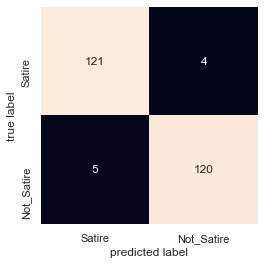

In [64]:
conf_mat = confusion_matrix(y_test_news, rf_test_preds_lem)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Satire', 'Not_Satire'], yticklabels=['Satire', 'Not_Satire'])
plt.xlabel('predicted label')
plt.ylabel('true label');

# Conclusions and Next Steps
- Learning foundations of NLP allows us represent our language in a way that computers understand
- We can use the machine learning algorithms that we already learned to classify text documents
- However, there are still disadvantages to represent language this way
- Topic Modeling 
- Word embeddings: word2vec and doc2vec
